In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


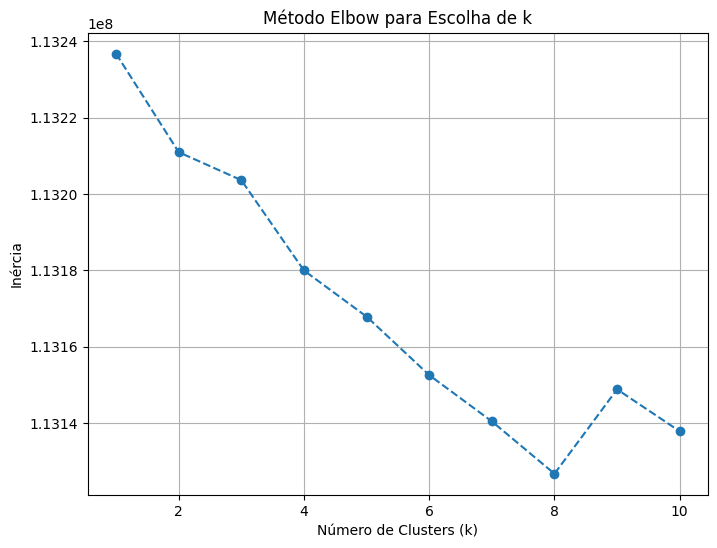

Silhouette Score: -0.01506241356986162
                                             WKT  gml_id  OBJECTID  \
0   POINT (-6.146166665999942 54.04933333300005)  F61__1         1   
1  POINT (-5.946166665999954 54.049833333000038)  F61__2         2   
2   POINT (-5.90083333299998 54.049666666000064)  F61__3         3   
3             POINT (-5.8525 54.049166666000083)  F61__4         4   
4             POINT (-5.800166665999939 54.0495)  F61__5         5   

  beginLifespanVersion   endLifespanVersion                    datasetName  \
0  2000-02-18T21:32:00  2016-10-12T14:20:00  Contaminants in Water Station   
1  2000-02-14T23:56:00  2016-10-12T14:20:00  Contaminants in Water Station   
2  2000-02-14T23:45:00  2016-10-12T14:20:00  Contaminants in Water Station   
3  2000-02-14T23:31:00  2016-10-12T14:20:00  Contaminants in Water Station   
4  2000-02-14T23:22:00  2016-10-12T14:20:00  Contaminants in Water Station   

     localId                                          inspireId  \
0  I

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Carrega o dataset
df = pd.read_csv("Contaminants In Water In The Marine Environment.csv")

# Seleciona as colunas relevantes como features para o agrupamento e remove as colunas não numéricas irrelevantes
X = df.drop(columns=["WKT", "gml_id", "datasetName", "localId", "inspireId", "inspireTheme", 
                     "description", "resultAcquisitionSource", "specialisedEMFType", "processType", 
                     "resultNature", "environmentalMonitoringActivity", "activityConditions", 
                     "responsibleParty", "environmentalMonitoringProgramme", 
                     "environmentalMonitoringNetwork", "additionalDescription", "specificReference", 
                     "legislationCitation", "dateEnteredIntoForce", "legislationLevel", "linkToJournal", 
                     "coordinateReferenceSystem", "styleLayerDescription", "licence", "dataProvenance", 
                     "dataAccessUrl"])

# Codifica colunas categóricas usando one-hot encoding
X = pd.get_dummies(X)

# Padroniza as features usando StandardScaler para normalizá-las
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar a inércia (soma dos quadrados das distâncias dentro de cada cluster) para diferentes valores de k
inertia = []

# Loop para testar diferentes valores de k (número de clusters) e calcular a inércia para cada k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotagem do gráfico "Elbow" para ajudar na escolha do número ótimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow para Escolha de k')
plt.grid(True)
plt.show()

# Após a escolha do número de clusters, aplica o K-Means novamente com k=5 (por exemplo)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

# Calcula e exibe o Silhouette Score, uma métrica de qualidade do agrupamento
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Adiciona os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# Exibe as primeiras linhas do DataFrame com os clusters atribuídos
print(df.head())


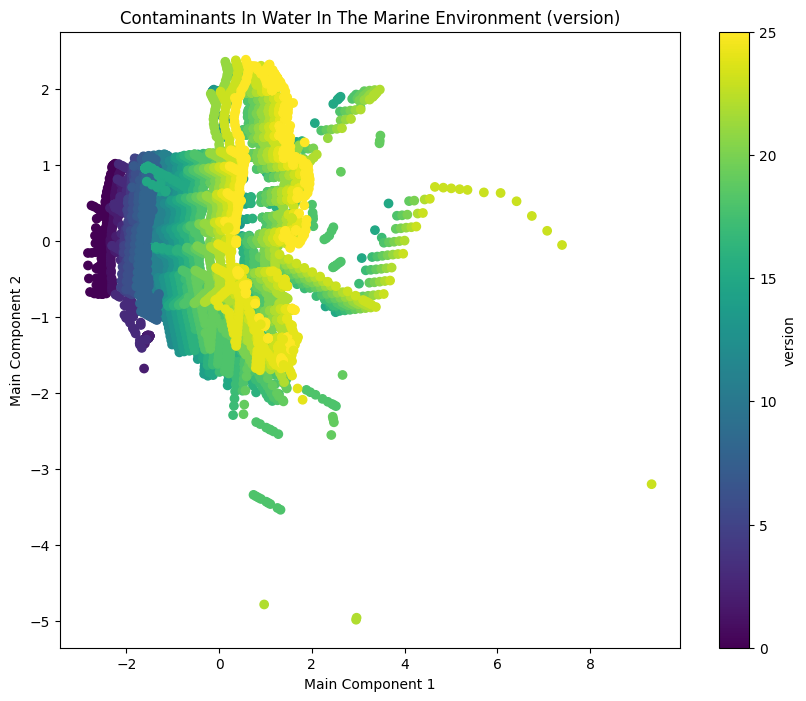

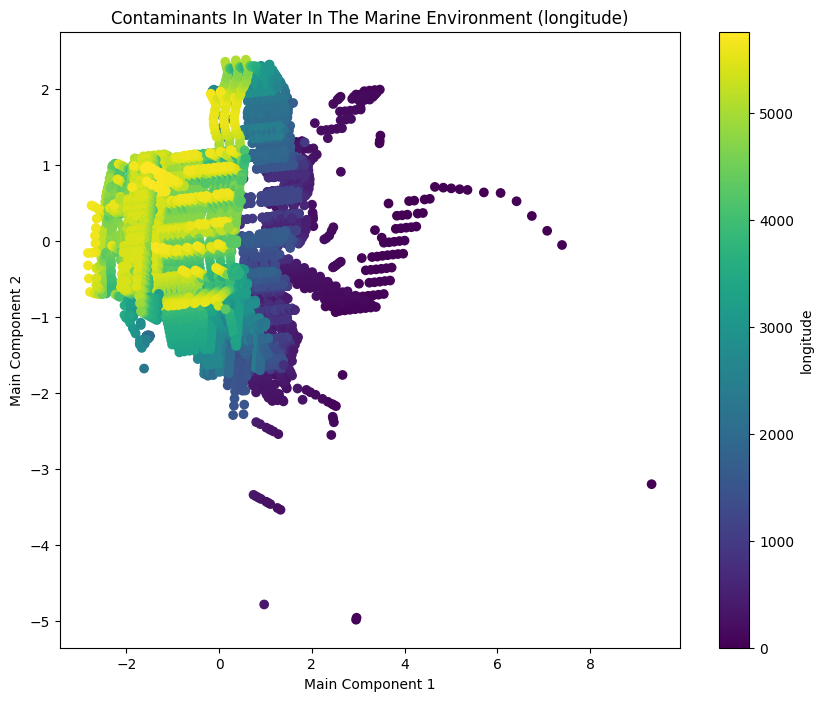

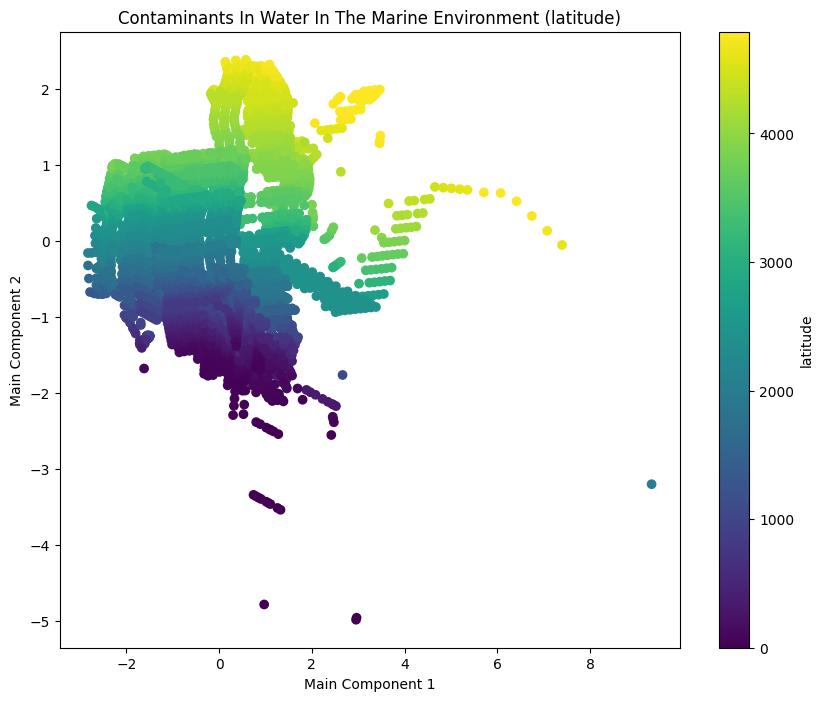

C:\Users\USER\AppData\Local\Temp\ipykernel_15236\3520821913.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
C:\Users\USER\AppData\Local\Temp\ipykernel_15236\3520821913.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')


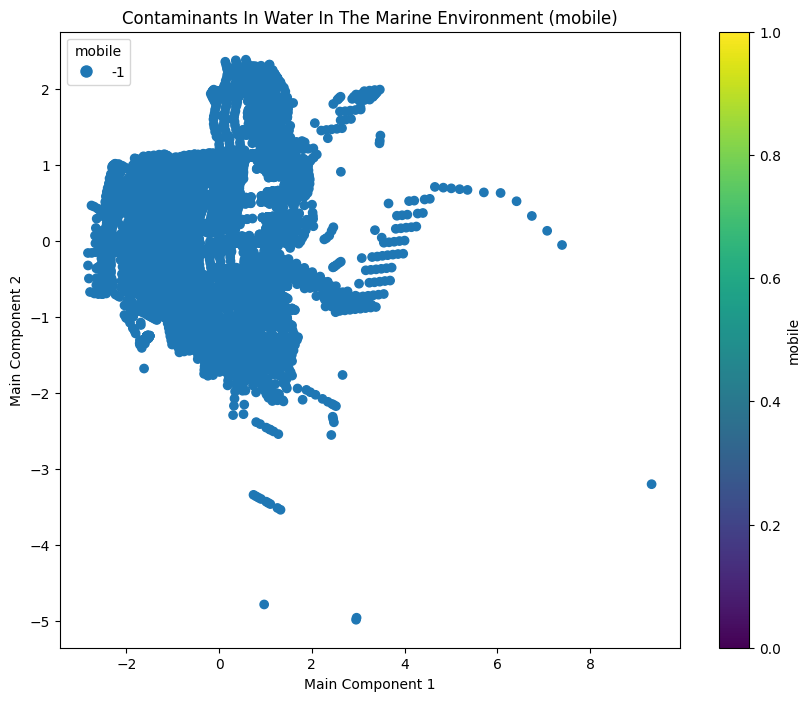

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

def perform_pca_and_visualize(df, features, color_column):
    # Padroniza os dados (importante para o PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # Inicializa o PCA e ajuste aos dados
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Cria um DataFrame para visualizar os resultados do PCA
    df_pca = pd.DataFrame(data=X_pca, columns=['Main Component 1', 'Main Component 2'])

    # Define o mapa de cores
    if df[color_column].dtype == 'object' or len(df[color_column].unique()) <= 10:  # Considera categóricas colunas com menos de 10 valores únicos
        unique_values = df[color_column].unique()
        color_map = dict(zip(unique_values, plt.cm.get_cmap('tab10', len(unique_values)).colors))
        colors = df[color_column].map(color_map)
        legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
                         for label, color in color_map.items()]
    else:
        colors = pd.Categorical(df[color_column]).codes
        legend_labels = None

    # Visualiza os resultados
    plt.figure(figsize=(10, 8))
    sc = plt.scatter(df_pca['Main Component 1'], df_pca['Main Component 2'], c=colors, cmap='viridis')

    # Adicione uma barra de cores
    plt.colorbar(sc, label=color_column)

    # Adicione a legenda das cores, se aplicável
    if legend_labels:
        plt.legend(handles=legend_labels, title=color_column, loc='upper left')

    plt.xlabel('Main Component 1')
    plt.ylabel('Main Component 2')
    plt.title(f'Contaminants In Water In The Marine Environment ({color_column})')
    plt.show()

def main():
    # Carrega o conjunto de dados "dados_monitoramento_marinho.csv"
    df = pd.read_csv('Contaminants In Water In The Marine Environment.csv')

    # Seleciona as características para aplicar o PCA, excluindo colunas não numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    features = [col for col in numeric_columns if col not in ["OBJECTID", "beginLifespanVersion", "endLifespanVersion"]]

    # Execute PCA e visualiza os resultados para todas as colunas numéricas do DataFrame
    for column in features:
        perform_pca_and_visualize(df, features, column)

if __name__ == "__main__":
    main()
